In [4]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# loading the given yulu dataset
df = pd.read_csv('yulu_data.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


Problem Statement:- Given Yulu dataset of shape(10886,12) having columns like 'datetime', 'season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'.Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute.Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.They wanted to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

Column Profiling:
datetime: datetime
season: season (1: spring, 2: summer, 3: fall, 4: winter)
holiday: whether day is a holiday or not 
workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp: temperature in Celsius
atemp: feeling temperature in Celsius
humidity: humidity
windspeed: wind speed
casual: count of casual users
registered: count of registered users
count: count of total rental bikes including both casual and registered

In [3]:
#shape of the dataset
df.shape

(10886, 12)

In [5]:
#columns of the dataset
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [4]:
#Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [25]:
# As datetime column is in object dtype we are converting converting to datetime d-type for making further analysis easy.
# converting columns like season,holiday and working day,weather as object d-type(categorical variables) as they are mostly encoded(label encoding and hot encoding)

df['datetime'] = pd.to_datetime(df['datetime'])
cols_conv = ['season','holiday','workingday','weather']
for col in cols_conv:
    df[col] = df[col].astype('object')

In [12]:
#converted dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [5]:
#checking for null values
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
# transpose of statistically summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [8]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [10]:
#Unique values in each column of the dataset
df.nunique().sort_values(ascending = False)

datetime      10886
count           822
registered      731
casual          309
humidity         89
atemp            60
temp             49
windspeed        28
season            4
weather           4
holiday           2
workingday        2
dtype: int64

In [12]:
#checking for duplicated rows
df.duplicated().sum()

0

In [14]:
# value counts of seasons
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [15]:
# vlaue counts of holiday
df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [16]:
# value counts of workingday
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [17]:
# value counts of weather
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [6]:
df['casual'].value_counts()

casual
0      986
1      667
2      487
3      438
4      354
      ... 
332      1
361      1
356      1
331      1
304      1
Name: count, Length: 309, dtype: int64

In [7]:
df['registered'].value_counts()

registered
3      195
4      190
5      177
6      155
2      150
      ... 
570      1
422      1
678      1
565      1
636      1
Name: count, Length: 731, dtype: int64

In [19]:
# Minimum and maximum temp in the dataset
df['temp'].min(),df['temp'].max()

(0.82, 41.0)

In [20]:
# Minimum and maximum feeling temperature in celsius
df['atemp'].min(),df['atemp'].max()

(0.76, 45.455)

In [21]:
# Minimum and maximum humidity 
df['humidity'].min(),df['humidity'].max()

(0, 100)

In [22]:
# Minimum and maximum windspeed
df['windspeed'].min(),df['windspeed'].max()

(0.0, 56.9969)

In [3]:
# Minimum and maximum datetime in the dataset
df['datetime'].min(),df['datetime'].max()

('2011-01-01 00:00:00', '2012-12-19 23:00:00')

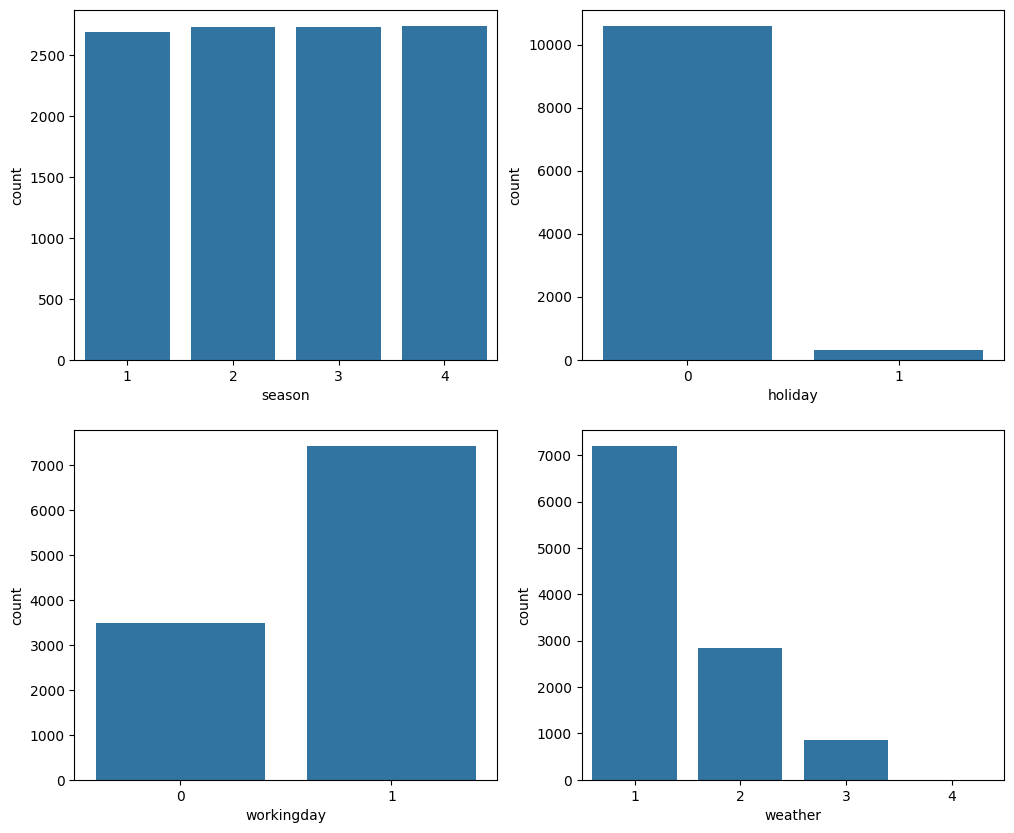

In [14]:
# Univariate analysis - count of the categorical columns 
fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(12,10))

cols_req = ['season','holiday','workingday','weather']
index=0
for i, col in enumerate(cols_req):
    sns.countplot(data=df, x=col, ax=axis[i // 2, i % 2])
    index+=1
plt.show()

Observations:-
1) The count of season 1 is a bit less than season 2,3,4(they are approximatel equal counts)
2) The working days are more and the holidays are less
3) The count of weather days which are Clear, Few clouds, partly cloudy, partly cloudy are high

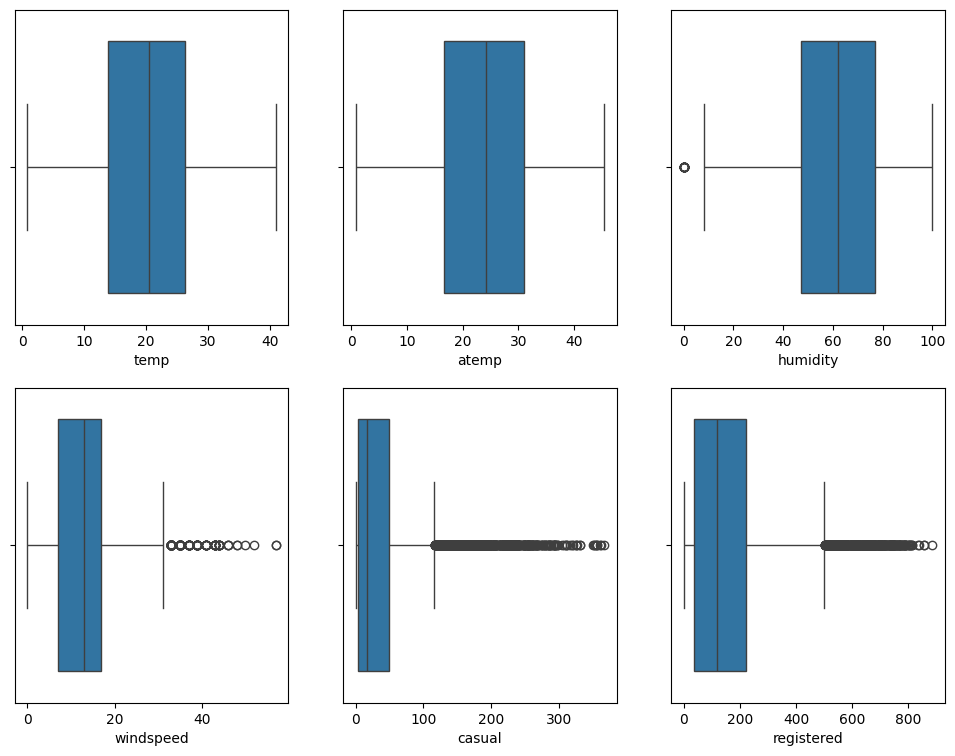

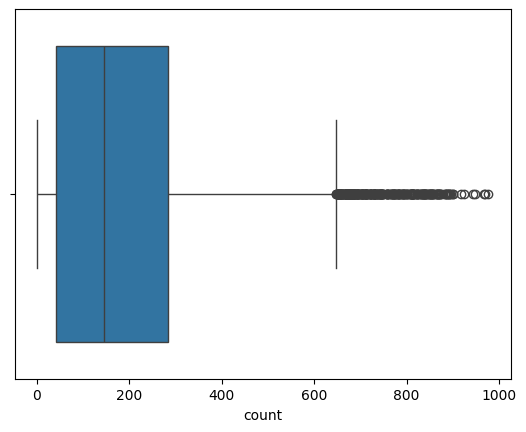

In [36]:
# Plotting box plots to detect outliers in the data
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(12,9))

cols_req = ['temp','atemp','humidity','windspeed','casual','registered','count']
index=0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[cols_req[index]],ax=axis[row,col])
        index+=1
plt.show()
sns.boxplot(x=df[cols_req[-1]])
plt.show()

Observations:- 
some of the columns like humidity and windspeed have few outliers
columns like casual,registered,count have more outliers

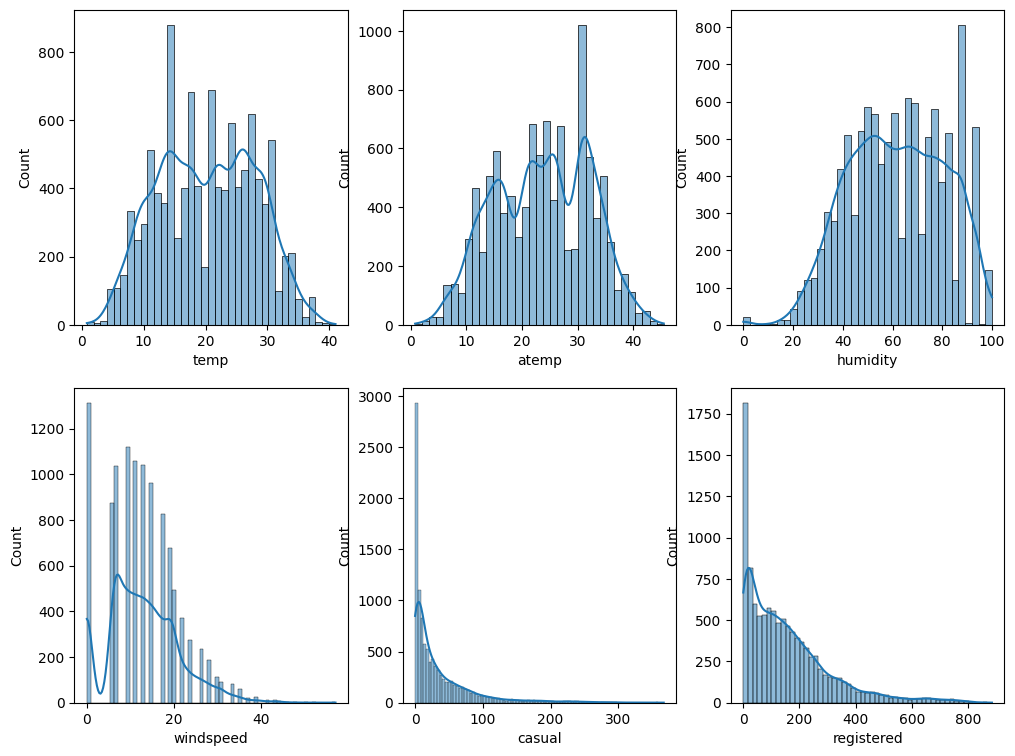

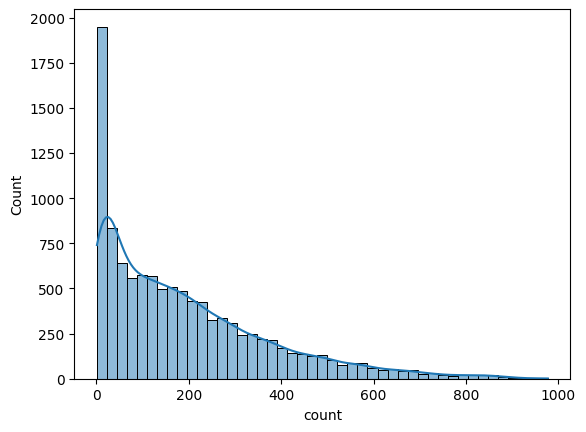

In [38]:
# Plotting histplot with kde on numerical variables

fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(12,9))

cols_req = ['temp','atemp','humidity','windspeed','casual','registered','count']
index=0
for row in range(2):
    for col in range(3):
        sns.histplot(x=df[cols_req[index]],ax=axis[row,col],kde=True)
        index+=1
plt.show()
sns.histplot(x=df[cols_req[-1]],kde=True)
plt.show()

Observations:- 
1) Both the temp and atemp appears to be approximately normally distributed.
2) Humidity appears to be a bit left skewed
3) The windspeed distribution appears to be right-skewed.
4) Both casual and registered user distributions are heavily right-skewed.There are significantly more registered users compared to casual users.
5) The distribution of the total count of bike rentals ('count') shows a similar pattern to the sum of 'casual' and 'registered' users.
It exhibits a right-skewed distribution.

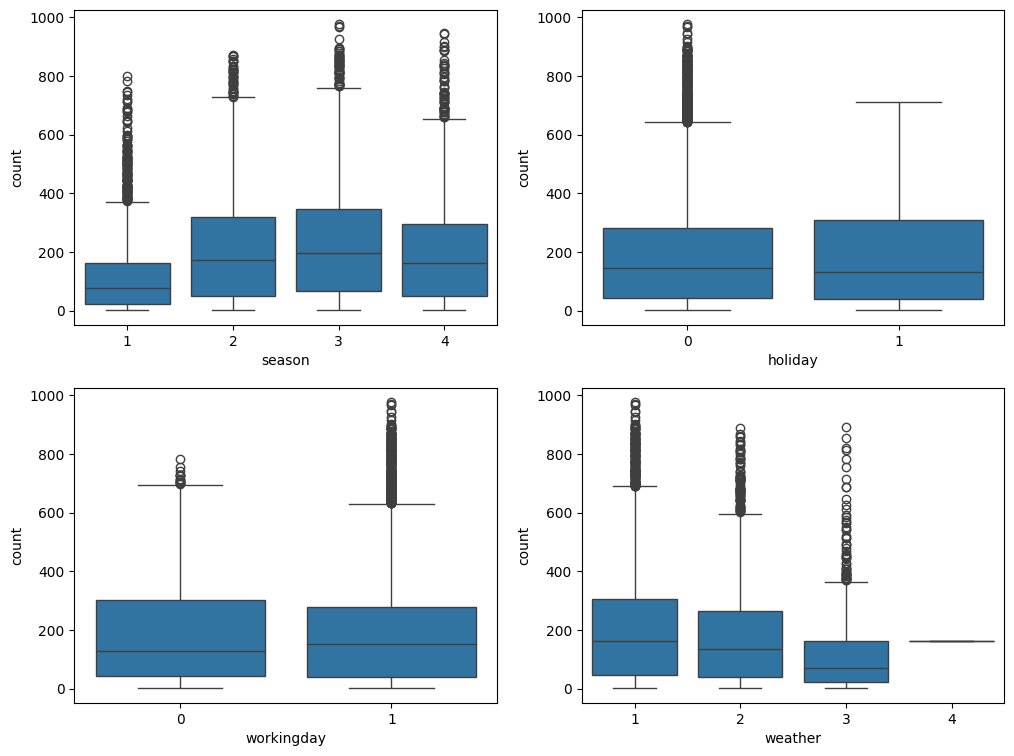

In [40]:
# plotting boxplots of categorical columns against count variable.
fig,axis=plt.subplots(nrows=2,ncols=2,figsize=(12,9))

cols_req = ['season','holiday','workingday','weather']
index=0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df,x=cols_req[index],y='count',ax=axis[row,col])
        index+=1
plt.show()

Observations:-
1) season:-
Generally, more bike rentals occur during seasons 2 and 3 (summer and fall), while fewer rentals are observed in seasons 1 and 4 (spring and winter).There are potential outliers in each season.
2) Holiday:-
   On holidays (holiday=1), the median rental count appears slightly lower compared to non-holidays (holiday=0).There are fewer outliers on holidays compared to non-holidays, indicating less variability in rental counts during holiday periods.
3) workingday:-
   On working days (workingday=1), the median rental count is higher compared to non-working days (workingday=0).Working days exhibit more outliers, indicating higher variability in rental counts during weekdays.
4) weather:-
   Weather condition 1 shows higher median rental counts compared to others.Weather condition 3 has the lowest median rental count, indicating decreased bike rentals during adverse weather conditions.Weather condition 4 exhibits a wide interquartile range, suggesting significant variability in rental counts during extreme weather events.

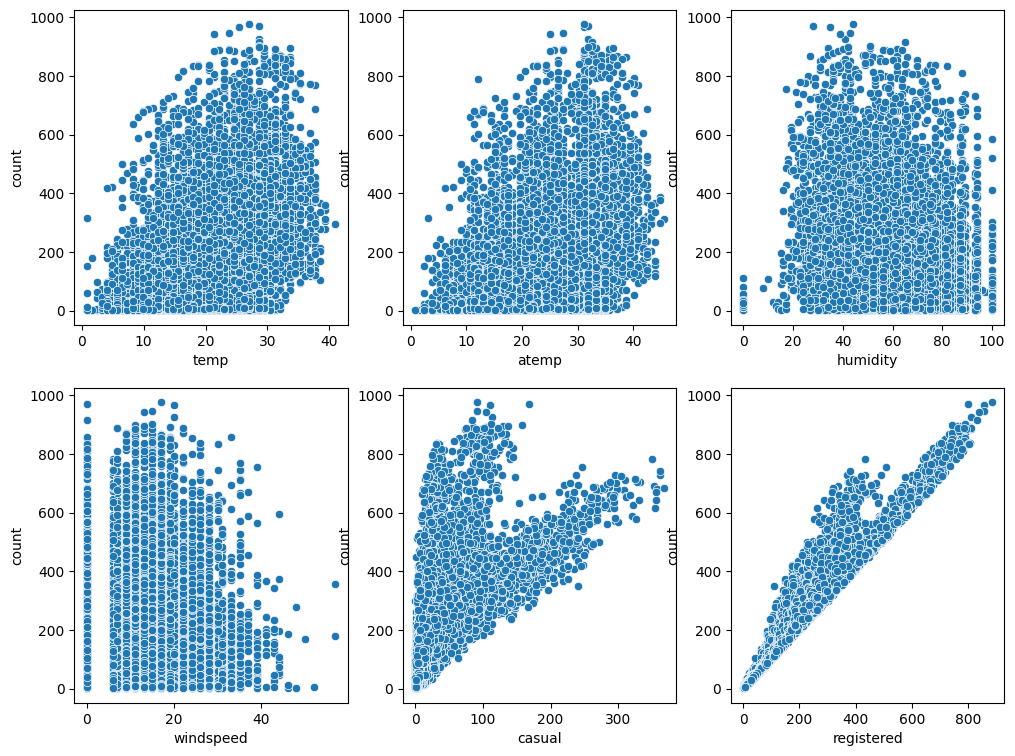

In [42]:
#Plotting scatter plot against numerical columns
fig,axis=plt.subplots(nrows=2,ncols=3,figsize=(12,9))

cols_req = ['temp','atemp','humidity','windspeed','casual','registered']
index=0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df,x=cols_req[index],y='count',ax=axis[row,col])
        index+=1
plt.show()

Observations:-
1) Both 'temp' and 'atemp' variables show a positive correlation with the total count of bike rentals.the relation seems to be linear.As the temperature increases, the number of bike rentals tends to increase as well.

2) At humidity below 20 and above 80 we can see low bike rentals.there is no clear relation between them.However, there seems to be a slightly negative correlation, indicating that higher humidity levels may be associated with slightly lower bike rental counts.

3) Similar to humidity, there is no clear linear relationship between windspeed and bike rental counts.Most data points are concentrated at lower windspeed values, with a few scattered data points at higher windspeeds(>35,>40)

4) Both 'casual' and 'registered' user counts exhibit a positive correlation with the total count of bike rentals.As the number of casual and registered users increases, the total rental count tends to increase as well.


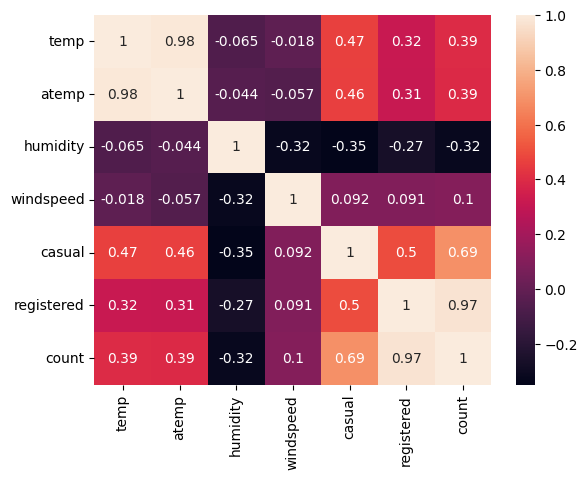

In [46]:
# heatmap showing correlations among different variables in a dataset
cols_req = ['temp','atemp','humidity','windspeed','casual','registered','count']
df_cols = df[cols_req]
sns.heatmap(df_cols.corr(),annot=True)
plt.show()

Observations:-

1) Both 'temp' and 'atemp' variables show a strong positive correlation with each other
Both variables also exhibit a positive correlation with the total count of bike rentals ('count'), indicating that higher temperatures are associated with more bike rentals.


2) Humidity shows a weak negative correlation with the total count of bike rentals ('count'). However, the correlation is not very strong.
This suggests that higher humidity levels may be associated with slightly lower bike rental counts, but the effect is not significant.


3) Windspeed has a very weak negative correlation with the total count of bike rentals ('count').This indicates that there is almost no relationship between windspeed and bike rental counts.

4) Both 'casual' and 'registered' user counts exhibit a strong positive correlation with the total count of bike rentals ('count').

In [10]:
np.var(working_days)/np.var(non_working_days)

1.1282458858519429

In [9]:
# Hypothesis testing 
# H0:- Working Day has no effect on number of electric cycles rented
# Ha:- Working Day has effect on number of electric cycles rented
# we can take the equal_var as True as the ration is not a significant value
# using two sample independent t test to derive t_statistic and p_value to derive conclusions at 95% significance level

from scipy.stats import ttest_ind

working_days = df[df['workingday'] == 1]['count']
non_working_days = df[df['workingday'] == 0]['count']

t_statistic, p_value = ttest_ind(working_days, non_working_days, equal_var=True)  

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis:Working Day has effect on number of electric cycles rented.")
else:
    print("Fail to reject the null hypothesis:Working Day has no effect on number of electric cycles rented ")


T-statistic: 1.2096277376026694
P-value: 0.22644804226361348
Fail to reject the null hypothesis:Working Day has no effect on number of electric cycles rented 


Using ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season 
Before conducting an ANOVA (Analysis of Variance) test, it's essential to ensure that the assumptions of the test are met i.e.
1) Independence: Observations within each group are independent of each other.
2) Normality: The data is normally distributed within each group.
3) Homogeneity of Variance: The variances of groups are to be homogenous

In [46]:
# Grouping of renatls based on season
season_groups = [df[df['season'] == i]['count'] for i in df['season'].unique()]

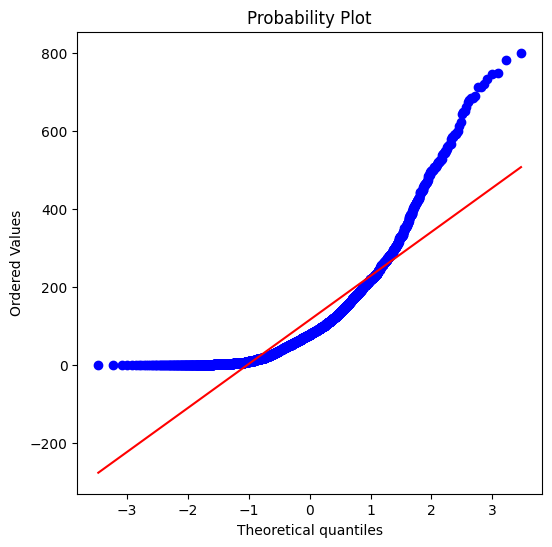

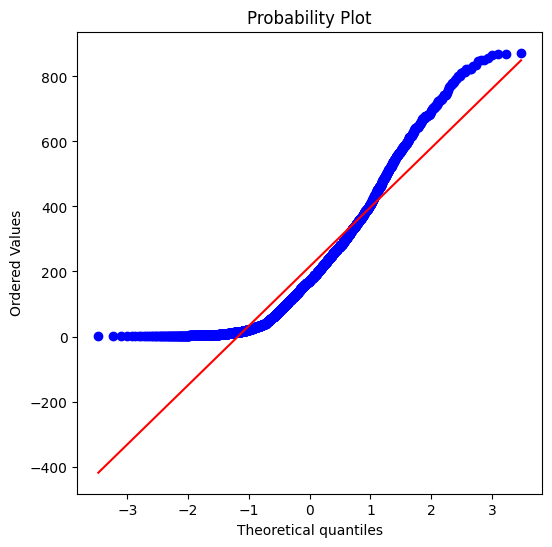

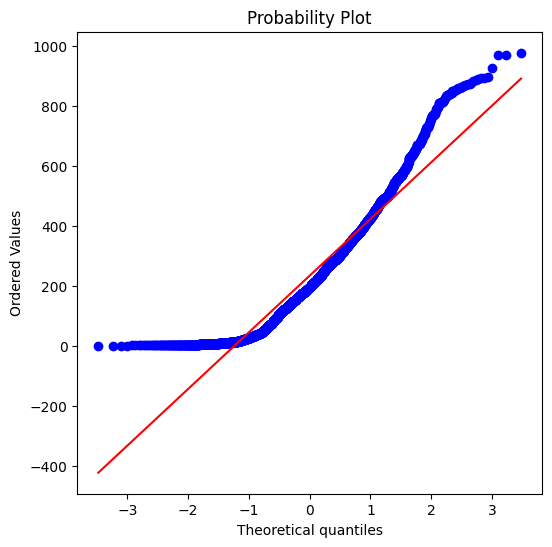

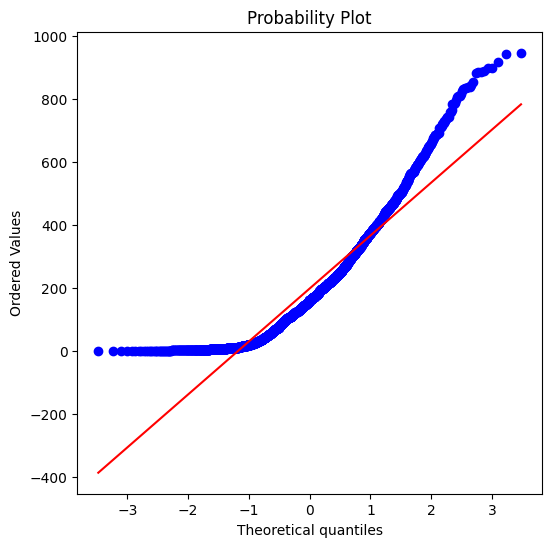

In [48]:
# QQ plot to check the distribution of data
from scipy.stats import probplot, shapiro

for i, group in enumerate(season_groups, 1):
    plt.figure(figsize=(6, 6))
    probplot(group, dist="norm", plot=plt)
    plt.show()


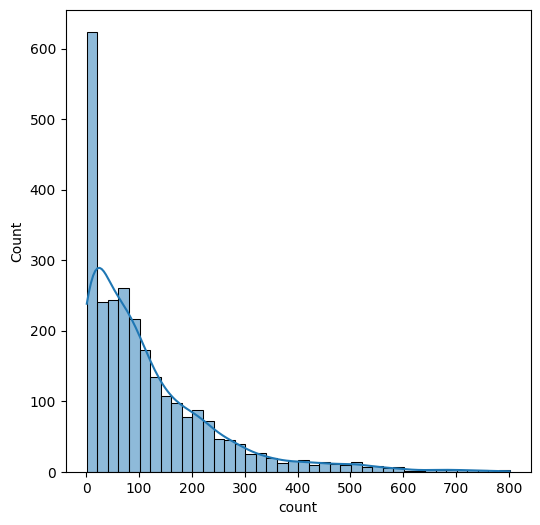

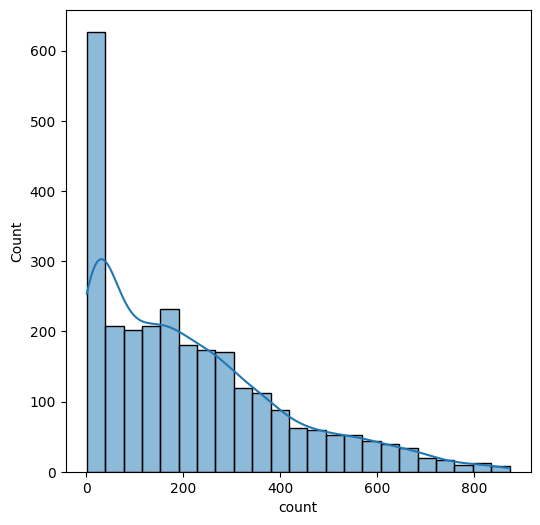

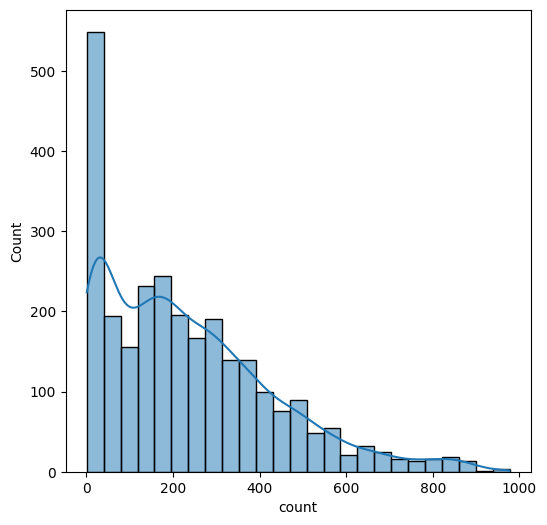

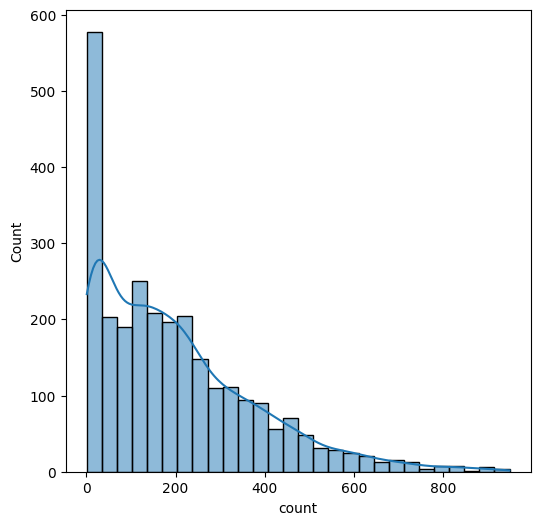

In [50]:
# Histplot with kde for  the data in season groups
for i, group in enumerate(season_groups, 1):
    plt.figure(figsize=(6, 6))
    sns.histplot(group, kde=True)
    plt.show()

Observations:_ The above data is not normally distributed.Mostly right skewed.

In [49]:
# shapiro wilks test to check normality of data in season groups
# H0:-The data is normally distributed
# Ha:-The data is not normally distributed 
shapiro_results = []

for i, group in enumerate(season_groups, 1):
    stat, p_value = shapiro(group)
    shapiro_results.append((i, stat, p_value))
    
for i, stat, p_value in shapiro_results:
    print(f"Season {i}: Statistics={stat}, P-value={p_value}, Normal={p_value > 0.05}")


Season 1: Statistics=0.8087378401253588, P-value=8.749584618867662e-49, Normal=False
Season 2: Statistics=0.9004818080893252, P-value=6.039374406270491e-39, Normal=False
Season 3: Statistics=0.9148166372899196, P-value=1.043680518918597e-36, Normal=False
Season 4: Statistics=0.8954637482095505, P-value=1.1299244409282836e-39, Normal=False


observations:-
P_val is very small hence we can reject null hypothesis.The data is not normally distributed.

In [41]:
# Levenes test to check for variances of the season groups
# H0: Variances of all groups are equal.
# H1: Variances of at least one group are not equal to the variances of the other groups.

from scipy.stats import levene

# Perform Levene's test for equality of variances
statistic, p_value = levene(*season_groups)

print(f"Statistic={statistic}, P-value={p_value}, Equal Variance={p_value > 0.05}")

Statistic=187.7706624026276, P-value=1.0147116860043298e-118, Equal Variance=False


Observation:-
Variances of at least one group are not equal to the variances of the other groups.i.e variances are not equal 

In [18]:
# we can try doing annova test even though the assumptions are not met 
# H0:- No.of cycles rented similar in different seasons- There is no significant difference in the number of cycles rented across different seasons.
# Ha:- No. of cycles rented is not similar in different seasons.There is a significant difference in the number of cycles rented across different seasons.

from scipy.stats import f_oneway

season_groups = [df[df['season'] == i]['count'] for i in range(1, 5)]

f_statistic, p_value = f_oneway(season_groups[0], season_groups[1], season_groups[2], season_groups[3])

print("F-statistic:", f_statistic)
print("P-value:", p_value)

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the number of cycles rented across different seasons.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the number of cycles rented across different seasons.")


F-statistic: 236.94671081032106
P-value: 6.164843386499654e-149
Reject the null hypothesis: There is a significant difference in the number of cycles rented across different seasons.


In [43]:
# If the assumptions of ANOVA, such as normality and homogeneity of variances, are violated, one suitable alternative is the Kruskal-Wallis test, which is a non-parametric test analogous to one-way ANOVA.
#The Kruskal-Wallis test assesses whether the medians of two or more independent groups are equal. It does not assume normality or homogeneity of variances, making it robust to violations of these assumptions.

from scipy.stats import kruskal
kruskal_statistic, kruskal_p_value = kruskal(*season_groups)
print("Kruskal-Wallis Statistic:", kruskal_statistic)
print("P-value:", kruskal_p_value)

# Interpretation
alpha = 0.05
if kruskal_p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the number of cycles rented across different seasons.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the number of cycles rented across different seasons.")


Kruskal-Wallis Statistic: 699.6668548181988
P-value: 2.479008372608633e-151
Reject the null hypothesis: There is a significant difference in the number of cycles rented across different seasons.


In [53]:
# Grouping of data based on the weather
weather_groups = [df[df['weather'] == i]['count'] for i in df['weather'].unique()]

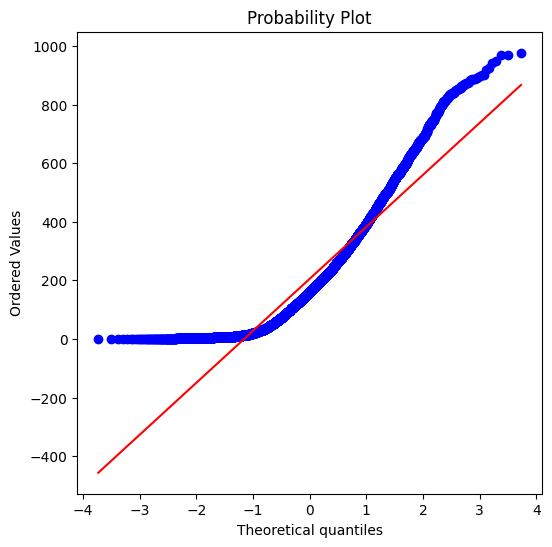

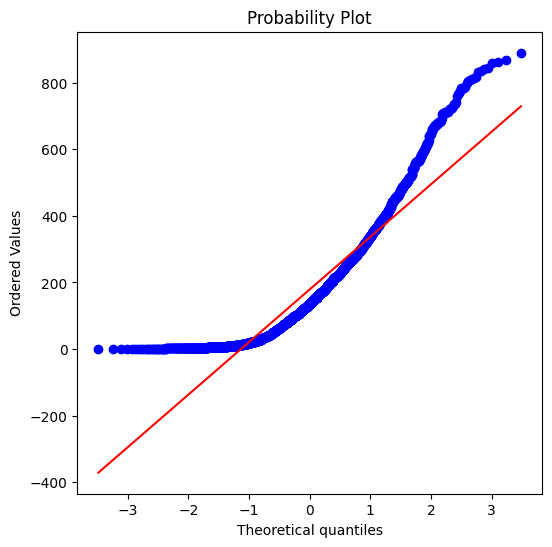

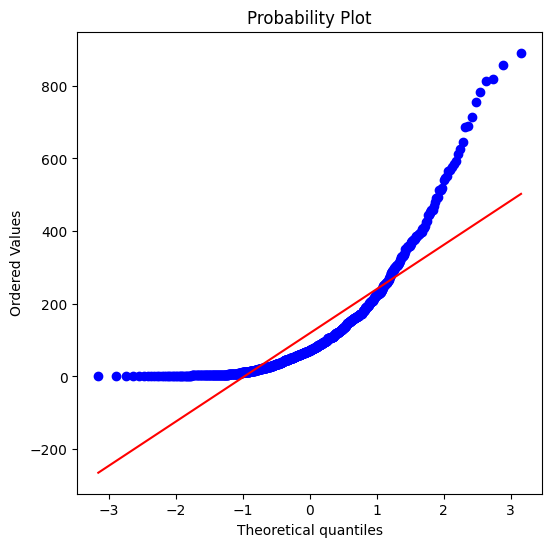

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


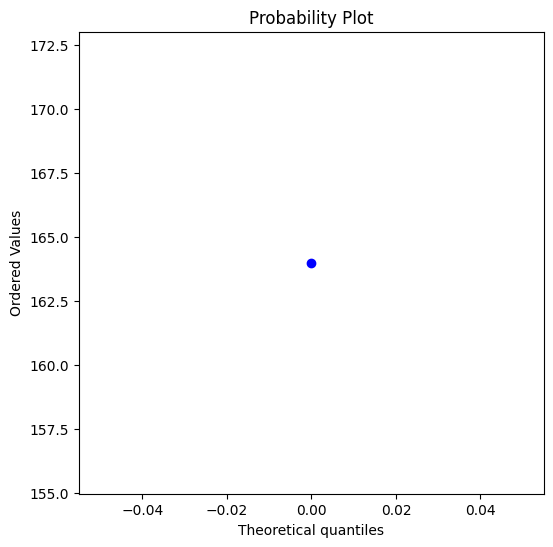

In [54]:
# QQplot based of the weather groups to check the normality of the data
for i, group in enumerate(weather_groups, 1):
    plt.figure(figsize=(6, 6))
    probplot(group, dist="norm", plot=plt)
    plt.show()

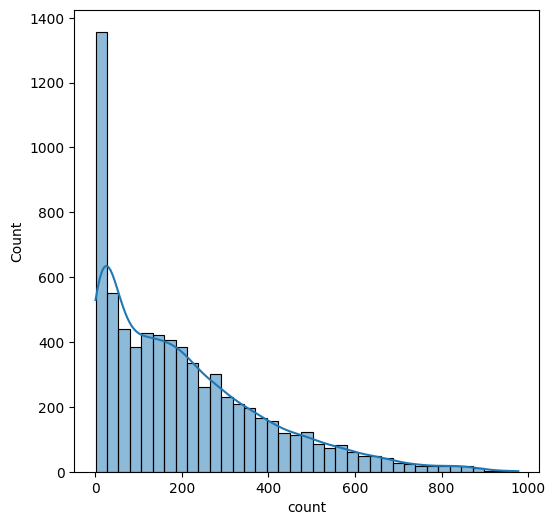

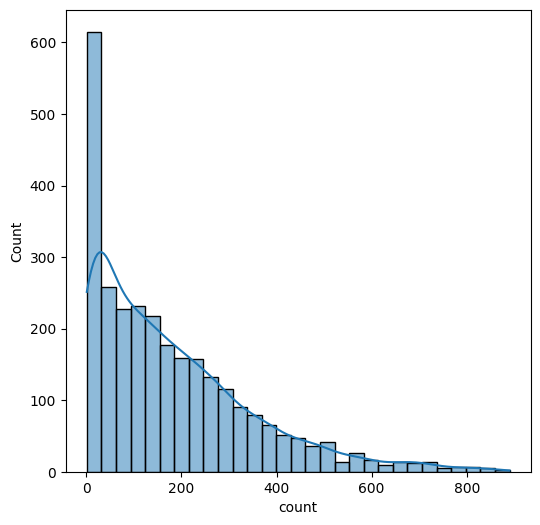

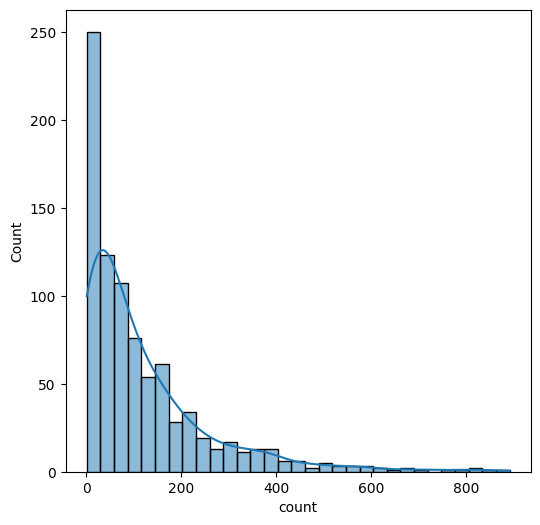

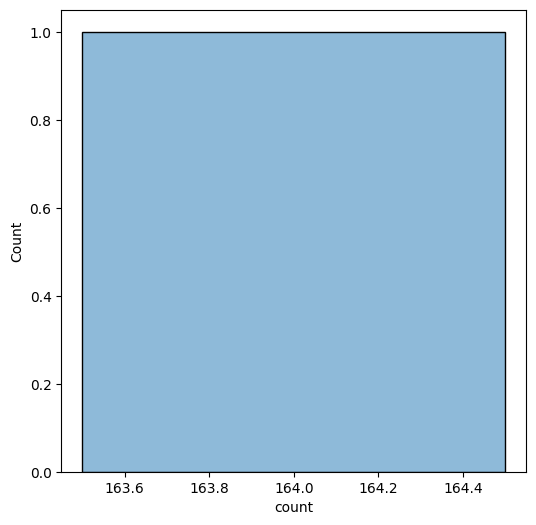

In [55]:
# Histplot with kde of the weather groups to check normality of the data 
for i, group in enumerate(weather_groups, 1):
    plt.figure(figsize=(6, 6))
    sns.histplot(group, kde=True)
    plt.show()

Obsrvations:- from the above plots,we can say that they are not normally distributed

In [63]:
# Minimum 3 samples are required to carry out shapiro test
shapiro_results = []

for i, group in enumerate(weather_groups, 1):
    if len(group) < 3:
        print(f"Skipping Weather {i}: Insufficient data points for Shapiro-Wilk test (minimum 3 required).")
        continue
    
    # Perform Shapiro-Wilk test for normality
    stat, p_value = shapiro(group)
    shapiro_results.append((i, stat, p_value))
    
for i, stat, p_value in shapiro_results:
    print(f"Weather {i}: Statistics={stat}, P-value={p_value}, Normal={p_value > 0.05}")


Skipping Weather 4: Insufficient data points for Shapiro-Wilk test (minimum 3 required).
Weather 1: Statistics=0.8909259459740138, P-value=1.5964921477006555e-57, Normal=False
Weather 2: Statistics=0.8767694973495206, P-value=9.777839106111785e-43, Normal=False
Weather 3: Statistics=0.7674327906035717, P-value=3.875893017396149e-33, Normal=False


/var/folders/qv/81b4b3cn3s750k7zsnnfhvyw0000gp/T/ipykernel_2688/1712649819.py:9: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7192.
  stat, p_value = shapiro(group)


Observation :- P_val is very small hence we can reject null hypothesis.The data is not normally distributed.

In [62]:
from scipy.stats import levene

# Perform Levene's test for equality of variances
statistic, p_value = levene(*weather_groups)

print(f"Statistic={statistic}, P-value={p_value}, Equal Variance={p_value > 0.05}")

Statistic=54.85106195954556, P-value=3.504937946833238e-35, Equal Variance=False


Observation:- Variances of at least one group are not equal to the variances of the other groups.i.e variances are not equal 

In [65]:
# Assumption are violated,hence we proceed with kruskal test
# H0:-There is no significant difference in the number of cycles rented across different weather conditions.
# Ha:- There is a significant difference in the number of cycles rented across different weather conditions.

kruskal_statistic, kruskal_p_value = kruskal(*weather_groups)
print("Kruskal-Wallis Statistic:", kruskal_statistic)
print("P-value:", kruskal_p_value)

# Interpretation
alpha = 0.05
if kruskal_p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the number of cycles rented across different weather conditions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the number of cycles rented across different weather conditions.")


Kruskal-Wallis Statistic: 205.00216514479087
P-value: 3.501611300708679e-44
Reject the null hypothesis: There is a significant difference in the number of cycles rented across different weather conditions.


In [61]:
# only one data for weather 4
df[df['weather'] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


In [66]:
#The frequency counts of different weather conditions for each season.
season_weather_data = pd.crosstab(df['season'],df['weather'])
season_weather_data 

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [75]:
# chi_square test to check if weather is dependent on the season as they are two categorical variable having samples greater than 3 we used chi-square test
# H0:- weather is independent on the season(no significant association between them) 
# Ha:- weather is not independent i.e dependent on the season (there is significant association between them)
# we derived chi2_stat and p_value at 95% significance level

import pandas as pd
from scipy.stats import chi2_contingency

# Perform chi-square contingency test
chi2_statistic, p_value, dof, expected = chi2_contingency(season_weather_data)

# Print the results
print("Chi-Square Statistic:", chi2_statistic)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:",expected)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between season and weather.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between season and weather.")


Chi-Square Statistic: 49.158655596893624
P-value: 1.549925073686492e-07
Degrees of Freedom: 9
Expected Frequencies: [[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
Reject the null hypothesis: There is a significant association between season and weather.


In [22]:
from scipy.stats import ttest_ind

# Extract bike rental counts for holiday and non-holiday days
bike_rentals_holiday = df[df['holiday'] == 1]['count']
bike_rentals_non_holiday = df[df['holiday'] == 0]['count']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(bike_rentals_holiday, bike_rentals_non_holiday)

# Print results
print("Independent Samples t-test:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in bike rentals between holiday and non-holiday days.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in bike rentals between holiday and non-holiday days.")


Independent Samples t-test:
T-statistic: -0.5626388963477119
P-value: 0.5736923883271103
Fail to reject the null hypothesis: There is no significant difference in bike rentals between holiday and non-holiday days.


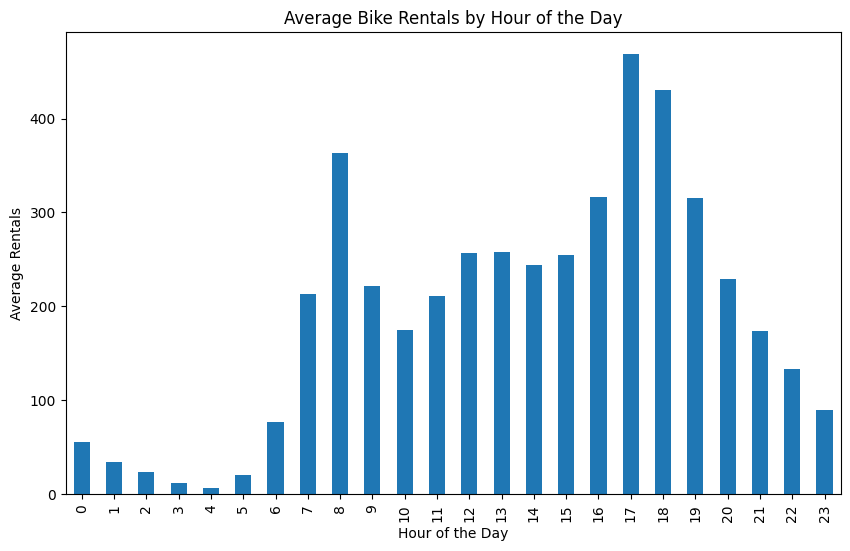

In [26]:
df['hour_of_day'] = df['datetime'].dt.hour

# Aggregate bike rental counts by hour of the day
hourly_rentals = df.groupby('hour_of_day')['count'].mean()

# Plot the average number of rentals by hour of the day
plt.figure(figsize=(10, 6))
hourly_rentals.plot(kind='bar')
plt.title('Average Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.show()

Observations/Inferences:-
1) In summer and fall seasons more bikes are rented as compared to other seasons.
2) At humidity below 20 and above 80 we can see low bike rentals
3) At temperature below 10 and above 35 low bikes are rented.
4) Registered rentals are more than casual rentals.
5) There is no significant difference in bike rentals between holiday and non-holiday days.
6) There is a significant association between season and weather.
7) There is a significant difference in the number of cycles rented across different weather conditions.
8) There is a significant difference in the number of cycles rented across different seasons.
9) Working Day has no effect on number of electric cycles rented
10) Weather condition 1 shows higher median rental counts compared to others.Weather condition 3 has the lowest median rental count, indicating decreased bike rentals during adverse weather conditions.
11) There is a peak of rental count at 8,17,18,19 hours 

Recommendations:-
1) The company should focus on increasing customers during spring and winter seasons by giving them some incentives like decreasing fares and gifting vouchers etc
2) There is no significant difference in bike rentals between holiday and non-holiday days.so more focus has to be up on holiday season at tourist places  by making collaborations with other platforms to attract tourists (like rooms and plane or train tickets - collaboration with trip advisor,agoda etc.,)
3) Availabilty of rentals based on the humidity and temperature should be focused up on
4) Changing fares based on seasons and weather conditions might be helpful to attarct more customers
5) customers who are casual are to be focused up on to convert them to registered customers
6) Increase in overall count of customers can be achieved by analysing the customer demographics.